In [ ]:
!pip install -q -U langchain transformers bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.1 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BitsAndBytesConfig
from langchain import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Mistral 7b

In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

model_4bit = AutoModelForCausalLM.from_pretrained( "mistralai/Mistral-7B-Instruct-v0.1", device_map="auto",quantization_config=quantization_config, )
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
pipeline_inst = pipeline(
        "text-generation",
        model=model_4bit,
        tokenizer=tokenizer,
        use_cache=True,
        device_map="auto",
        max_length=2500,
        do_sample=True,
        top_k=5,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id,
)

In [ ]:
llm = HuggingFacePipeline(pipeline=pipeline_inst)

In [ ]:

template = """[INST] You are an respectful and helpful assistant, respond always be precise, assertive and politely answer in few words conversational english.
Answer the question below from context below :
{question} [/INST]
"""

In [ ]:
def generate_response(question, context):
  prompt = PromptTemplate(template=template, input_variables=["question","context"])
  llm_chain = LLMChain(prompt=prompt, llm=llm)
  response = llm_chain.run({"question":question, "context":context})
  return response

In [ ]:
generate_response("Name one president of america?", '')

'[INST] You are an respectful and helpful assistant, respond always be precise, assertive and politely answer in few words conversational english.\nAnswer the question below from context below :\nName one president of america? [/INST]\n\nGeorge Washington is one president of America.'

In [ ]:
generate_response("What is the state of LMM nowadays?")


'[INST] You are an respectful and helpful assistant, respond always be precise, assertive and politely answer in few words conversational english.\nAnswer the question below from context below :\nWhat is the state of LMM nowadays? [/INST]\nI am unable to provide a current update on the state of LMM, as I do not have access to up-to-date information and do not have a context to determine what you mean by LMM. Can you please provide more specific details or context so I can assist you better?'

#Data Analysis


In [ ]:
import pandas as pd
data = pd.read_csv('test_process_1000.csv')
data

,Unnamed: 0,pageID,headerType,headerContent,text,url
0,0,2,1,Контакты,For English version please follow the link\nНа...,https://www.hse.ru/contacts.html
1,1,3,1,Сведения,"о доходах, расходах, об имуществе и обязательс...",https://www.hse.ru/anticorruption/information
2,2,4,1,XXIV Ясинская международная научная конференци...,Личный кабинет\nЛичный кабинет,https://conf.hse.ru/2023
3,3,4,2,Ключевые цифры,3000+\nучастников\n200+\nиностранных участнико...,https://conf.hse.ru/2023
4,4,4,2,Новости,«Антропологический и нейрокогнитивный кластеры...,https://conf.hse.ru/2023
...,...,...,...,...,...,...
2628,2628,996,0,About HSE University – HSE University,Consistently ranked as one of Russia’s top uni...,https://www.hse.ru/en/info/
2629,2629,997,0,Все мероприятия ВШЭ — Национальный исследовате...,"Сегодня, 21 апреля, воскресеньеПрием работ - д...",https://www.hse.ru/news/announcements/
2630,2630,998,1,Crypto Investors Receive Downside Risk Premiums,Higher average returns on cryptocurrencies com...,https://iq.hse.ru/en/news/881213802.html
2631,2631,999,1,Студсовет факультета,Студенческий совет – главный орган студенческо...,https://hum.hse.ru/studsovet


In [ ]:
data = data.dropna()
data['text'] = data['text'].replace('\n', ' ', regex=True)
data.head()

,Unnamed: 0,pageID,headerType,headerContent,text,url
0,0,2,1,Контакты,For English version please follow the link Нац...,https://www.hse.ru/contacts.html
1,1,3,1,Сведения,"о доходах, расходах, об имуществе и обязательс...",https://www.hse.ru/anticorruption/information
2,2,4,1,XXIV Ясинская международная научная конференци...,Личный кабинет Личный кабинет,https://conf.hse.ru/2023
3,3,4,2,Ключевые цифры,3000+ участников 200+ иностранных участников 3...,https://conf.hse.ru/2023
4,4,4,2,Новости,«Антропологический и нейрокогнитивный кластеры...,https://conf.hse.ru/2023
...,...,...,...,...,...,...
2628,2628,996,0,About HSE University – HSE University,Consistently ranked as one of Russia’s top uni...,https://www.hse.ru/en/info/
2629,2629,997,0,Все мероприятия ВШЭ — Национальный исследовате...,"Сегодня, 21 апреля, воскресеньеПрием работ - д...",https://www.hse.ru/news/announcements/
2630,2630,998,1,Crypto Investors Receive Downside Risk Premiums,Higher average returns on cryptocurrencies com...,https://iq.hse.ru/en/news/881213802.html
2631,2631,999,1,Студсовет факультета,Студенческий совет – главный орган студенческо...,https://hum.hse.ru/studsovet


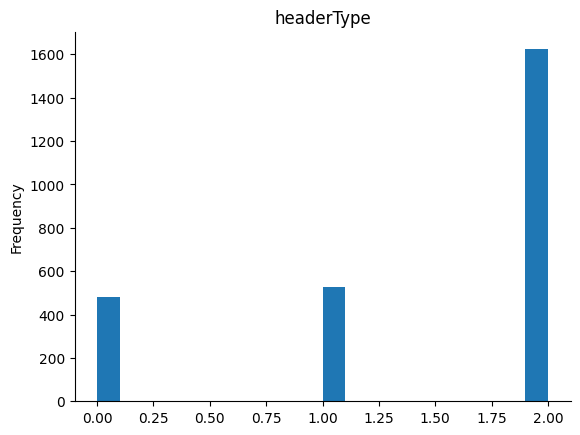

In [ ]:
from matplotlib import pyplot as plt
data['headerType'].plot(kind='hist', bins=20, title='headerType')
plt.gca().spines[['top', 'right',]].set_visible(False)

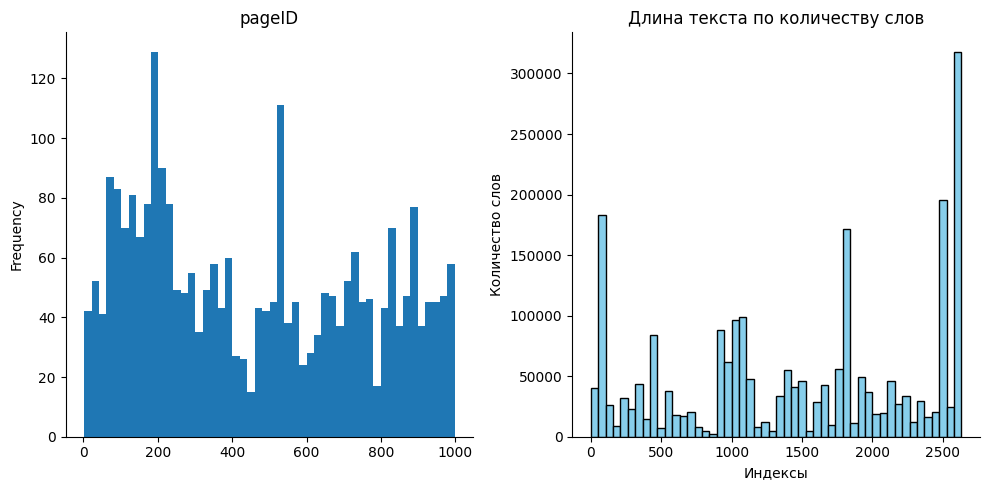

In [ ]:
from matplotlib import pyplot as plt

# Подсчет количества слов в тексте и добавление в новый столбец
data['text_word_count'] = data['text'].apply(lambda x: len(x.split()))

# Построение гистограммы количества слов в тексте относительно индексации
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['pageID'].plot(kind='hist', bins=50, title='pageID')
plt.gca().spines[['top', 'right']].set_visible(False)

# Оценка длины текста в колонке 'text'
plt.subplot(1, 2, 2)
plt.hist(data.index, weights=data['text_word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Длина текста по количеству слов')
plt.xlabel('Индексы')
plt.ylabel('Количество слов')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


#Elastic

In [1]:
!pip install elasticsearch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.5/477.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 3.8 MB/s eta 0:00:00


In [2]:
from elasticsearch import Elasticsearch

# Connection details from Elastic Cloud
cloud_id = "20eafc9be1fe433d9e1602ed3e953814:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyRhMDE4ZmJhNTY3ZGU0Zjg4OTYwOGQ2MmZhMmYxYTNmOSQzZGQ1YjNkN2IyOWU0ZmIwOTBiMzEyNjVmOTU1MzQxYQ=="  # Format: "<cluster-name>:

# Create Elasticsearch client
es = Elasticsearch(
    cloud_id=cloud_id,
    basic_auth=("elastic", "e7pqLhFkPWIBOLAX5BbIw9yo")
)

# Test the connection by retrieving cluster health
health = es.cluster.health()
print(health)


{'cluster_name': 'a018fba567de4f889608d62fa2f1a3f9', 'status': 'green', 'timed_out': False, 'number_of_nodes': 3, 'number_of_data_nodes': 2, 'active_primary_shards': 117, 'active_shards': 234, 'relocating_shards': 0, 'initializing_shards': 0, 'unassigned_shards': 0, 'delayed_unassigned_shards': 0, 'number_of_pending_tasks': 0, 'number_of_in_flight_fetch': 0, 'task_max_waiting_in_queue_millis': 0, 'active_shards_percent_as_number': 100.0}


In [7]:
!unzip processed_pages_30k.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: processed_pages_30k/28522.json  
  inflating: processed_pages_30k/28531.json  
  inflating: processed_pages_30k/28532.json  
  inflating: processed_pages_30k/28581.json  
  inflating: processed_pages_30k/28686.json  
  inflating: processed_pages_30k/28692.json  
  inflating: processed_pages_30k/28704.json  
  inflating: processed_pages_30k/28733.json  
  inflating: processed_pages_30k/28825.json  
  inflating: processed_pages_30k/28838.json  
  inflating: processed_pages_30k/28846.json  
  inflating: processed_pages_30k/28858.json  
  inflating: processed_pages_30k/28879.json  
  inflating: processed_pages_30k/28882.json  
  inflating: processed_pages_30k/28918.json  
  inflating: processed_pages_30k/28953.json  
  inflating: processed_pages_30k/28958.json  
  inflating: processed_pages_30k/28971.json  
  inflating: processed_pages_30k/28973.json  
  inflating: processed_pages_30k/29014.json  
  inflating:

In [ ]:
import os
import json

# Создание индекса
index_name = "my_index"
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name)

# Папка, содержащая ваши файлы JSON
folder_path = "processed_pages_30k"  # Замените на путь к вашей папке с данными

# Список ошибочных документов
error_documents = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):
        file_path = os.path.join(folder_path, file_name)
        try:
            with open(file_path, "r") as file:
                text = json.load(file)
                # Проверка, что text является JSON
                if isinstance(text, dict):
                    # Индексация документа
                    es.index(index=index_name, body=text)
                else:
                    print(f"Документ {file_name} не является JSON.")
                    error_documents.append(file_name)
        except Exception as e:
            print(f"Ошибка при индексации документа {file_name}: {e}")
            error_documents.append(file_name)

print("Данные успешно загружены в Elasticsearch.")


FileNotFoundError: [Errno 2] No such file or directory: 'processed_pages_5000'

#Обработанный индекс

In [3]:
import os
import json
from elasticsearch import Elasticsearch

# Создание индекса с явной схемой
index_name = 'my_new_index'
mapping = {
    "mappings": {
        "dynamic": "true",
        "properties": {}
    }
}

# Создание индекса
es.indices.create(index=index_name, body=mapping, ignore=400)

# Создание Ingest Pipeline для извлечения дат с русскими месяцами
pipeline_body = {
    "description": "Extract dates in various formats from text with Russian month names",
    "processors": [
        {
            "grok": {
                "field": "_source.message",  # измените на любое поле, которое может содержать текст
                "patterns": [
                    "%{MONTHDAY:day}-%{MONTHNUM:month}-%{YEAR:year}",
                    "%{MONTHDAY:day} %{RUSSIANMONTH:month_name} %{YEAR:year}",
                    "%{MONTHDAY:day} %{RUSSIANMONTH:month_name}, %{YEAR:year}",
                    "%{MONTHDAY:day} %{MONTHNUM:month} %{YEAR:year}"
                ],
                "pattern_definitions": {
                    "RUSSIANMONTH": "Января|Февраля|Марта|Апреля|Мая|Июня|Июля|Августа|Сентября|Октября|Ноября|Декабря"
                },
                "ignore_missing": True
            }
        },
        {
            "script": {
                "source": """
                if (ctx.month_name != null) {
                    def months = [
                        'Января': '01', 'Февраля': '02', 'Марта': '03', 'Апреля': '04', 'Мая': '05', 'Июня': '06',
                        'Июля': '07', 'Августа': '08', 'Сентября': '09', 'Октября': '10', 'Ноября': '11', 'Декабря': '12'
                    ];
                    ctx.month = months[ctx.month_name];
                }
                if (ctx.day != null && ctx.month != null && ctx.year != null) {
                    ctx.date = ctx.year + '-' + ctx.month + '-' + (ctx.day.length() == 1 ? '0' + ctx.day : ctx.day);
                } else {
                    ctx.date = null;
                }
                """
            }
        },
        {
            "date": {
                "field": "date",
                "formats": ["yyyy-MM-dd"],
                "ignore_failure": True
            }
        }
    ]
}

es.ingest.put_pipeline(id='date_extraction_pipeline', body=pipeline_body)

# Папка, содержащая ваши файлы JSON
folder_path = "processed_pages_30k"  # Замените на путь к вашей папке с данными

# Список ошибочных документов
error_documents = []

# Функция для проверки и подготовки документов перед индексацией
def process_document(file_name, file_path):
    with open(file_path, "r", encoding='utf-8') as file:
        try:
            text = json.load(file)
        except json.JSONDecodeError:
            print(f"Файл {file_name} не является допустимым JSON.")
            error_documents.append(file_name)
            return

        if isinstance(text, dict):
            # Индексация документа с использованием pipeline
            try:
                es.index(index=index_name, body=text, pipeline='date_extraction_pipeline')
                print(f"Документ {file_name} успешно загружен.")
            except Exception as e:
                print(f"Ошибка при индексации документа {file_name}: {e}")
                error_documents.append(file_name)
        else:
            print(f"Документ {file_name} не является JSON объектом.")
            error_documents.append(file_name)

# Загрузка данных в новый индекс с применением pipeline
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):
        file_path = os.path.join(folder_path, file_name)
        process_document(file_name, file_path)

print("Данные успешно загружены в Elasticsearch.")
if error_documents:
    print("Некоторые документы не удалось загрузить:")
    for doc in error_documents:
        print(doc)


<ipython-input-3-4d62154c2055>:15: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.create(index=index_name, body=mapping, ignore=400)


FileNotFoundError: [Errno 2] No such file or directory: 'processed_pages_30k'

In [4]:
# Проверка данных в новом индексе
search_query = {
    "query": {
        "match_all": {}
    }
}
search_results = es.search(index=index_name, body=search_query)

# Вывод найденных документов
for hit in search_results['hits']['hits']:
    print(hit['_source'])

{'date': None, 'data': [{'level': '1', 'response': [], 'text': 'Редакция'}, {'level': '2', 'response': [], 'text': 'РЕДАКЦИЯ'}, {'level': '2', 'response': [], 'text': 'РЕДАКЦИОННАЯ КОЛЛЕГИЯ'}, {'level': '2', 'response': [], 'text': 'МЕЖДУНАРОДНЫЙ РЕДАКЦИОННЫЙ СОВЕТ'}], 'description': '', 'links': ['https://demreview.hse.ru/user/setLocale/en_US', 'https://demreview.hse.ru/user/setLocale/ru_RU'], 'text': ['English', 'Русский'], 'title': '\n\t\tРедакция\n\t\t\t\t\t\t\t| Демографическое обозрение\n\t\t\t', 'url': 'https://demreview.hse.ru/about/editorialTeam'}
{'date': None, 'data': [{'level': '1', 'response': [], 'text': 'HSE ART AND. DESIGN SCHOOL'}, {'level': '2', 'response': [], 'text': 'СRASH. COURSES'}, {'level': '2', 'response': [], 'text': 'Новости'}, {'level': '2', 'response': [], 'text': 'О\xa0Высшей школе экономики'}], 'description': '', 'links': [], 'text': ['Александр Шабуров / 2 месяца / группа набрана', '«Видео-на-коленке»', 'На\xa0вариативе вы\xa0научитесь придумывать, сним

In [5]:
search_query = {
    "query": {
        "exists": {
            "field": "date"
        }
    }
}

# Выполнение поискового запроса
index_name = 'my_new_index'
search_results = es.search(index=index_name, body=search_query)

# Обработка результатов поиска
for hit in search_results['hits']['hits']:
    print(hit['_source'])  # Вывод найденных документов


#Поисковый запрос

In [9]:
search_query = {
    "query": {
        "match": {
            "data.text": "частые вопросы"
        }
    }
}



# Выполнение поискового запроса
search_results = es.search(index="my_index", body=search_query)

# Обработка результатов поиска
for hit in search_results['hits']['hits']:
    print(hit['_source'])  # Вывод найденных документов

{'date': None, 'data': [{'level': '2', 'response': ['Почтовый адрес:НИУ ВШЭ: Россия, 101000, г. Москва, ул. Мясницкая, д. 20Фактический адрес:109074, Москва, Славянская пл., д.4, стр. 2, офис 307, НИУ ВШЭТел.: (495) 772-95-90 доб. 12631Эл. почта: vgmu@hse.ru'], 'text': 'Контакты'}, {'level': '2', 'response': ['ОТНОСИТЕЛЬНО СРОКОВ', 'Как долго осуществляется рецензирование статьи?', 'Входящие статьи рецензируются в среднем в пределах 4–5 месяцев.', 'Сколько длится процесс доработки статьи?', 'Каждое повторное рассмотрение для статей,\xa0направляемых на доработку, занимает до 2-х месяцев. Срок устранения замечаний устанавливается до 2-х месяцев. Допускается не более 2-х повторных подач.', 'Каковы сроки публикации статьи?', 'Сроки публикации зависят от ряда факторов (загруженность рубрик, тематика статей номера и пр.). В среднем лист ожидания\xa0без учета рецензирования и при отсутствии рекомендаций по доработке статей со стороны наших экспертов составляет от полугода до года.', 'ПО ПУБЛИ

#Запрос к нейросети с контекстом

In [ ]:
generate_response("Расскажи о студенческом совете HSE с учетом контекста", search_results['hits']['hits'][0]['_source'])


NameError: name 'generate_response' is not defined

In [7]:
prompt = str(search_results['hits']['hits'][0]['_source']['text'])
prompt

"['F.A.Q.Самые частые вопросы о Студенческом Совете НИУ ВШЭЧто такое Студенческий совет? Студенческий совет является выборным представительным органом студенческого самоуправления, осуществляющим представительство мнений и интересов студентов, координацию реализации учебных, научных и внеучебных студенческих инициатив.\\xa0 Закреплен ли Студенческий совет в документах? Порядок формирования и деятельности, а также цели, задачи, структура и полномочия Студенческого совета НИУ ВШЭ установлены Положением о Студенческом совете, утверждённом Ученым советом НИУ ВШЭ. Чем Студсовет НИУ ВШЭ отличается от студсовета факультета или общежития? Студенческий совет НИУ ВШЭ - это выборный орган студенческого самоуправления, состоящий из представителей студенческих советов факультетов, общежитий и объединения иностранных студентов. В совет факультета или общежития входят только студенты, обучающиеся на данном факультете или проживающие в данном общежитии.\\xa0 Как попасть в Студенческий совет НИУ ВШЭ? Ч

#Функция поиска

In [8]:
def get_context(question):
    search_query = {
        "query": {
            "match": {
                "data.text": question
            }
        }
    }

    search_results = es.search(index="my_index", body=search_query)
    prompt = str(search_results['hits']['hits'][0]['_source'])
    return prompt

#Mistral Lora

In [ ]:
! pip -q install peft transformers langchain sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.5 MB/s eta 0:00:00


In [ ]:
! pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.3 MB/s eta 0:00:00


In [ ]:
import torch
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer, AutoModel
import torch.nn.functional as F
from langchain.prompts import PromptTemplate
import bitsandbytes as bnb

In [ ]:
torch.cuda.empty_cache()
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [ ]:
adapt_model_name = "IlyaGusev/saiga_mistral_7b_lora"
base_model_name = "Open-Orca/Mistral-7B-OpenOrca"
tokenizer = AutoTokenizer.from_pretrained(base_model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
device_map="auto"

#model = AutoPeftModelForCausalLM.from_pretrained(adapt_model_name, device_map=device_map, torch_dtype=torch.float16)

tokenizer_config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/101 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from transformers import BitsAndBytesConfig, pipeline
import torch

bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_quant_type="nf8",
    bnb_8bit_use_double_quant=True,
)
model = AutoPeftModelForCausalLM.from_pretrained(adapt_model_name,quantization_config=bnb_config, device_map=device_map, torch_dtype=torch.bfloat16)


Unused kwargs: ['bnb_8bit_quant_type', 'bnb_8bit_use_double_quant']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


adapter_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/623 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


adapter_model.safetensors:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

In [ ]:
# Load model from HuggingFace Hub
sent_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
sent_model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [ ]:
def get_embedding(sentence):

    #Mean Pooling - Take attention mask into account for correct averaging
    def _mean_pooling(model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    # Tokenize sentences
    encoded_input = sent_tokenizer([sentence], padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = sent_model(**encoded_input)

    # Perform pooling
    sentence_embeddings = _mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    return sentence_embeddings

In [ ]:
my_info_prompt = ("<s>system \nТы — Сайга, русскоязычный автоматический ассистент. Ты разговариваешь с людьми и помогаешь им.</s> \n<s>user \nТекст: {prompt} \nВопрос: {question}</s> \n<s>bot \nВот ответ на ваш вопрос длиной не более 50 слов:")

In [ ]:
def truncate_context(context, max_length=300):
    tokens = tokenizer.encode(context, add_special_tokens=False)
    # Обрезка контекста до max_length токенов
    if len(tokens) > max_length:
        tokens = tokens[-max_length:]
    truncated_context = tokenizer.decode(tokens, skip_special_tokens=True)
    return truncated_context

In [ ]:
def get_answer(info_prompt, question, prompt):
    truncated_context = truncate_context(context)

    prompt = info_prompt.format(question=question, prompt=prompt)
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(input_ids=inputs["input_ids"],
                            top_p=0.5,
                            temperature=0.3,
                            attention_mask=inputs["attention_mask"],
                            max_new_tokens=100,
                            pad_token_id=tokenizer.eos_token_id,
                            do_sample=True)

    output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    parsed_answer = output.split("Вот ответ на ваш вопрос длиной не более 50 слов:")[1].strip()

    if "bot:" in parsed_answer:
        parsed_answer = parsed_answer.split("bot:")[0].strip()

    # parsed_answer = output.split("bot:")[1].strip()
    return parsed_answer

In [ ]:
def get_cos_sim(question):
    cos_sim = F.cosine_similarity(emb_database, emb, dim=1, eps=1e-8)
    return cos_sim

In [ ]:
answers = []
emb_database = torch.empty((0, 384), dtype=torch.float32)

In [ ]:
question = "Расскажи о студенческом совете ВШЭ"
emb = get_embedding(question)

cos_sim = get_cos_sim(question)
answer = get_answer(my_info_prompt, question, prompt)
emb_database = torch.cat((emb_database, emb), 0)
answers.append(answer)
print(f'Answer from model: {answer}')

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1510: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Answer from model: Студенческий совет - выборный представительный орган студенческого самоуправления, осуществляющий представительство мнений и интересов студентов, координацию


#Сжатие инфы


In [ ]:
# Обновление pip, setuptools и wheel
!pip install --upgrade pip setuptools wheel

# Установка scikit-learn напрямую
!pip install scikit-learn

# Установка необходимых зависимостей
!pip install numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk

nltk.download('punkt')

def extract_key_sentences_tfidf(text, num_sentences=3):
    # Разбиение текста на предложения
    sentences = nltk.sent_tokenize(text)

    # Вычисление TF-IDF для предложений
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Нахождение средних значений TF-IDF для каждого предложения
    sentence_scores = np.array(tfidf_matrix.mean(axis=1)).flatten()

    # Индексы предложений с наивысшими средними значениями TF-IDF
    top_sentence_indices = sentence_scores.argsort()[-num_sentences:]

    # Извлечение ключевых предложений
    key_sentences = [sentences[i] for i in sorted(top_sentence_indices)]

    return ' '.join(key_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
key_sentences = extract_key_sentences_tfidf(prompt)
print(key_sentences)

Студенческий совет является выборным представительным органом студенческого самоуправления, осуществляющим представительство мнений и интересов студентов, координацию реализации учебных, научных и внеучебных студенческих инициатив.\xa0 Закреплен ли Студенческий совет в документах? Все заседания Студенческого совета НИУ ВШЭ являются открытыми.\xa0 Какое значение это все имеет для студентов?Участие в студенческом самоуправлении дает студентам возможность не только выразить свое мнение по поводу того или иного вопроса, но и проявить инициативу по улучшению жизни студентов в стенах университета. Это работает не только в масштабах всего университета - студсоветы общежитий ежедневно помогают множеству студентов решать бытовые проблемы разного масштаба, а советы факультетов занимаются более локальными проблемами студентов, связанными не только с учебным процессом, но и, например, с комфортом обучения в том или ином корпусе.


In [20]:
import pandas as pd

# Предположим, что questions_hse - это список вопросов

# Создаем пустой DataFrame
df = pd.DataFrame(columns=['Processed_Sentences'])

# Проходимся по каждому вопросу и сохраняем результаты обработки в DataFrame
for question in questions_hse:
    context = get_context(question)
    key_sentences = extract_key_sentences_tfidf(context)
    df.loc[len(df)] = [key_sentences]

# Путь к файлу CSV
csv_file_path = 'data.csv'

# Сохраняем DataFrame в CSV файл
df.to_csv(csv_file_path, index=False)


In [22]:
csv_file_path = 'data.csv'

# Чтение данных из CSV файла в DataFrame
data = pd.read_csv(csv_file_path)

# Вывод первых нескольких строк DataFrame
print(data)

                                  Processed_Sentences
0   {'title': 'Абитуриентам бакалавриата НИУ ВШЭ—П...
1   ', 'Образование', 'Стажер посещает занятия на\...
2   ', 'Эксперты НИУ ВШЭ – Пермь приняли участие в...
3   ', 'Подать заявку\xa0Задать вопрос\xa0Записать...
4   {'title': 'О Вышке в Нижнем Новгороде – Национ...
5   ', 'Требования к кандидатам:', '—\xa0наличие с...
6   {'title': 'Образовательный онлайн-проект «Карь...
7   ', 'Задать вопрос о программе Поступить', 'О п...
8   ', 'Образование', 'Стажер посещает занятия на\...
9   {'title': 'Аналитический центр – Национальный ...
10  {'title': 'Тема «общежития НИУ ВШЭ» – Новости ...
11  ', 'Основное образование', 'Бакалавриат', '16'...
12  {'title': 'Что в меню и есть ли очереди – Ново...
13  {'title': 'Факультет экономических наук – Наци...
14  ', 'Особенности организации перевода студентов...
15  {'title': 'Вход', 'description': '', 'url': 'h...
16  {'title': 'Медицинская и психологическая помощ...
17  {'title': 'Учебная лабор

#Подсчет индекса

In [11]:
questions_hse = [
    "Какие факультеты и программы предлагает НИУ ВШЭ?",
    "Каковы требования для поступления в НИУ ВШЭ?",
    "Какие документы необходимо подать для поступления в НИУ ВШЭ?",
    "Есть ли вступительные экзамены или тесты для поступления в НИУ ВШЭ, и как к ним подготовиться?",
    "Какова стоимость обучения на различных программах в НИУ ВШЭ?",
    "Предоставляются ли стипендии или гранты для студентов НИУ ВШЭ?",
    "Какие карьерные возможности открываются для выпускников НИУ ВШЭ?",
    "Есть ли у НИУ ВШЭ международные программы обмена студентами?",
    "Какие возможности для стажировок и практики доступны студентам НИУ ВШЭ?",
    "Какова средняя группа студентов на лекциях и семинарах в НИУ ВШЭ?",
    "Есть ли общежития для иногородних студентов в НИУ ВШЭ?",
    "Как организована внеучебная деятельность и студенческая жизнь в НИУ ВШЭ?",
    "Есть ли в НИУ ВШЭ спортивные секции и клубы по интересам?",
    "Какие возможности для научной работы и исследований предоставляются студентам НИУ ВШЭ?",
    "Какова процедура подачи заявки для иностранных студентов в НИУ ВШЭ?",
    "Какой уровень владения языком требуется для поступления в НИУ ВШЭ?",
    "Какие услуги предоставляет НИУ ВШЭ для поддержки студентов (например, психологическая помощь, карьерные консультации)?",
    "Каковы сроки подачи документов и зачисления в НИУ ВШЭ?",
    "Есть ли у НИУ ВШЭ партнерские отношения с крупными компаниями или предприятиями?",
    "Какова процедура апелляции в случае несогласия с результатами вступительных экзаменов в НИУ ВШЭ?"
]

In [ ]:
torch.cuda.empty_cache()

In [ ]:
for question in questions_hse:
  context = get_context(question)
  print(context)

['Прием в бакалавриат\xa0— 2024', 'Образовательные программы и состав вступительных испытаний', 'Документы и правила приема', 'Учет индивидуальных достижений', 'Учет олимпиад школьников', 'Готовьтесь к поступлению с нами!', 'Открыт набор на\xa0обучение в\xa02024/25\xa0учебном году:', 'Программы подготовки к\xa0ЕГЭ: 7\xa0предметов', 'Форум для абитуриентов бакалавриата', 'Задавайте все интересующие вопросы о поступлении в НИУ ВШЭ –\xa0Пермь!', 'Почему Вышка', '8', 'образовательных программ', '215', 'бюджетных мест', '380', 'платных мест', 'до\xa070%', 'скидки на\xa0платное обучение', 'Зачисленные на\xa01‑й курс абитуриенты\xa0— одни из\xa0самых сильных в\xa0стране', 'Студенческая мобильность: возможность обучаться в\xa0разных кампусах Вышки', 'Стажировки и\xa0практика в\xa0ведущих российских и\xa0международных компаниях', 'Международные лаборатории. Возможность заниматься наукой в\xa0команде с\xa0зарубежными профессорами', 'Удобные общежития для всех иногородних студентов', 'Большой выб

In [ ]:
len(prompt)

2331

In [ ]:
#генерация ответа до 50 токенов
for question in questions_hse:
  context = get_context(question)
  key_sentences = extract_key_sentences_tfidf(context)
  emb = get_embedding(question)

  cos_sim = get_cos_sim(question)
  answer = get_answer(my_info_prompt, question, key_sentences)
  emb_database = torch.cat((emb_database, emb), 0)
  answers.append(answer)
  get_cos_sim(question)
  print(question)
  print(f'Answer from model: {answer} \n')
  torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1510: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Какие факультеты и программы предлагает НИУ ВШЭ?
Answer from model: НИУ ВШЭ предлагает различные факультеты и программы, включая экономику, менеджмент, компьютерные науки, юриспруденцию, 

Каковы требования для поступления в НИУ ВШЭ?
Answer from model: Требования для поступления в НИУ ВШЭ зависят от выбранной программы и уровня образования. В целом, требуется заполнить заявку 

Какие документы необходимо подать для поступления в НИУ ВШЭ?
Answer from model: Для поступления в НИУ ВШЭ необходимо подать заявку, сдать экзамены ЕГЭ или аналогичные, предоставить справку о 

Есть ли вступительные экзамены или тесты для поступления в НИУ ВШЭ, и как к ним подготовиться?
Answer from model: Да, есть вступительные экзамены и тесты для поступления в НИУ ВШЭ.

Вот более подробный ответ:

Для поступления в 

Какова стоимость обучения на различных программах в НИУ ВШЭ?
Answer from model: Стоимость обучения в НИУ ВШЭ зависит от программы и формату обучения. Бакалавриат обычно стоит от 150 0 

Предоставл

In [ ]:
#генерация ответа до 100 токенов
for question in questions_hse:
  context = get_context(question)
  key_sentences = extract_key_sentences_tfidf(context)
  emb = get_embedding(question)

  cos_sim = get_cos_sim(question)
  answer = get_answer(my_info_prompt, question, key_sentences)
  emb_database = torch.cat((emb_database, emb), 0)
  answers.append(answer)
  get_cos_sim(question)
  print(question)
  print(f'Answer from model: {answer} \n')
  torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1510: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Какие факультеты и программы предлагает НИУ ВШЭ?
Answer from model: НИУ ВШЭ предлагает различные факультеты и программы, включая экономику, менеджмент, компьютерные науки, юриспруденцию, коммуникацию, медиа и дизайн, гуманитарные науки и другие. bot
Вот более подробный ответ:

НИУ ВШЭ предлагает различ 

Каковы требования для поступления в НИУ ВШЭ?
Answer from model: Требования для поступления в НИУ ВШЭ зависят от выбранной программы и уровня образования. В целом, требуется заполнить заявку, сдать экзамены и представить документы. bot
Требования для поступления в НИУ ВШЭ зависят от выбранной программы и 

Какие документы необходимо подать для поступления в НИУ ВШЭ?
Answer from model: Для поступления в НИУ ВШЭ необходимо подать заявку, сдать экзамены и предоставить необходимые документы, в том числе свидетельство о завершении среднего образования, справку о нетрудоспособности (если студент), справку о нетрудоспособности (если ас 

Есть ли вступительные экзамены или тесты для поступления

In [ ]:
emb = get_embedding(question)

In [ ]:
get_cos_sim(question)

tensor([0.7206, 0.8159, 0.7759, 0.7653, 0.8029, 0.7439, 0.7521, 0.6626, 0.7328,
        0.8245, 0.7279, 0.6983, 0.7357, 0.7664, 0.8109, 0.8008, 0.7721, 0.7954,
        0.7489, 1.0000, 0.7206, 0.8159, 0.7759, 0.7653, 0.8029, 0.7439, 0.7521,
        0.6626, 0.7328, 0.8245, 0.7279, 0.6983, 0.7357, 0.7664, 0.8109, 0.8008,
        0.7721, 0.7954, 0.7489, 1.0000])

# Старая Сайга Мистраль


In [ ]:
import torch
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

MODEL_NAME = "IlyaGusev/saiga_mistral_7b"
DEFAULT_MESSAGE_TEMPLATE = "<s>{role}\n{content}</s>"
DEFAULT_RESPONSE_TEMPLATE = "<s>bot\n"
DEFAULT_SYSTEM_PROMPT = "Ты — Сайга, русскоязычный автоматический ассистент. Ты разговариваешь с людьми и помогаешь им."

class Conversation:
    def __init__(
        self,
        message_template=DEFAULT_MESSAGE_TEMPLATE,
        system_prompt=DEFAULT_SYSTEM_PROMPT,
        response_template=DEFAULT_RESPONSE_TEMPLATE
    ):
        self.message_template = message_template
        self.response_template = response_template
        self.messages = [{
            "role": "system",
            "content": system_prompt
        }]

    def add_user_message(self, message):
        self.messages.append({
            "role": "user",
            "content": message
        })

    def add_bot_message(self, message):
        self.messages.append({
            "role": "bot",
            "content": message
        })

    def get_prompt(self, tokenizer):
        final_text = ""
        for message in self.messages:
            message_text = self.message_template.format(**message)
            final_text += message_text
        final_text += DEFAULT_RESPONSE_TEMPLATE
        return final_text.strip()


def generate(model, tokenizer, prompt, generation_config):
    data = tokenizer(prompt, return_tensors="pt", add_special_tokens=False)
    data = {k: v.to(model.device) for k, v in data.items()}
    output_ids = model.generate(
        **data,
        generation_config=generation_config
    )[0]
    output_ids = output_ids[len(data["input_ids"][0]):]
    output = tokenizer.decode(output_ids, skip_special_tokens=True)
    return output.strip()

config = PeftConfig.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    load_in_8bit=True,
    torch_dtype=torch.float16,
    device_map="auto"
)
model = PeftModel.from_pretrained(
    model,
    MODEL_NAME,
    torch_dtype=torch.float16
)
model.eval()

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=False)
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
print(generation_config)



ImportError: Using `low_cpu_mem_usage=True` or a `device_map` requires Accelerate: `pip install accelerate`

In [ ]:
inputs = ["Почему трава зеленая?", "Сочини длинный рассказ, обязательно упоминая следующие объекты. Дано: Таня, мяч"]
for inp in inputs:
    conversation = Conversation()
    conversation.add_user_message(inp)
    prompt = conversation.get_prompt(tokenizer)

    output = generate(model, tokenizer, prompt, generation_config)
    print(inp)
    print(output)
    print()
    print("==============================")
    print()

OutOfMemoryError: CUDA out of memory. Tried to allocate 122.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 53.06 MiB is free. Process 9795 has 14.69 GiB memory in use. Of the allocated memory 13.64 GiB is allocated by PyTorch, and 940.66 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import json
inputs = ["Расскажи о студсовете ВШЭ. Дано:" + json.dumps(search_results['hits']['hits'][0]['_source']['text'])]
for inp in inputs:
    conversation = Conversation()
    conversation.add_user_message(inp)
    prompt = conversation.get_prompt(tokenizer)

    output = generate(model, tokenizer, prompt, generation_config)
    print(inp)
    print(output)
    print()
    print("==============================")
    print()

# Mixtral


In [ ]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="auto",
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id, load_in_4bit=True, device_map="auto")

text = "Hello my name is"
messages = [
    {"role": "user", "content": "What is your favourite condiment?"},
    {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
    {"role": "user", "content": "Do you have mayonnaise recipes?"}
]

input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to("cuda")

outputs = model.generate(input_ids, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:983: UserWarning: Not enough free disk space to download the file. The expected file size is: 4983.00 MB. The target location /root/.cache/huggingface/hub only has 2999.03 MB free disk space.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:983: UserWarning: Not enough free disk space to download the file. The expected file size is: 4983.00 MB. The target location /root/.cache/huggingface/hub/models--mistralai--Mixtral-8x7B-Instruct-v0.1/blobs only has 2999.03 MB free disk space.
  warnings.warn(


model-00008-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device